<a href="https://colab.research.google.com/github/Chetan3520/TensorFlowDeveloper/blob/main/Tensorflow_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensorflow Classification**

#Introduction to neural network classification with Tensorflow
 #Binary Classification
 #Multiclass Classification
 #Multilabel Classfication



In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf
#make 1000 Examples
n_sample=1000
#Create circles
X,y=make_circles(n_sample,noise=0.03,random_state=42)

In [ ]:
#check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
#Our data is more hard to understand right now, let's visualize it!
import pandas as pd
circles=pd.DataFrame({"XO":X[:,0],"X1":X[:,1],"label":y})

In [ ]:
circles.head()

,XO,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


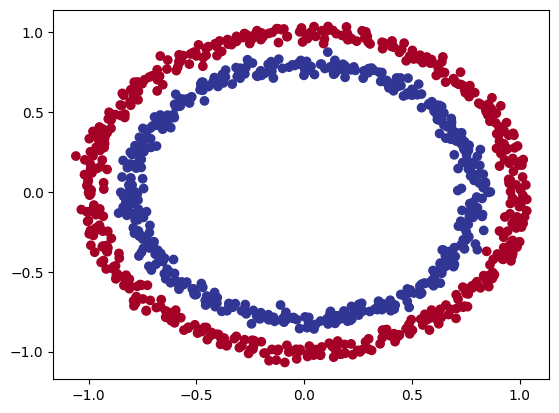

In [ ]:
#Vusialize the plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu);

#Input and Output Shapes

In [ ]:
#check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#view the first example of the features and labels
X[5],y[5]

(array([-0.47964637,  0.67643477]), 1)

# Steps in Modeling

In [ ]:
#Set the random seed
import tensorflow as tf
tf.random.set_seed(42)

#Create the model
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#tf.keras.optimizers.Adam()
# Compile the model
model2.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

# fit the model
model2.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 6.7322 - accuracy: 0.4830
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 6.5490 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 6.3605 - accuracy: 0.5050
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 6.2363 - accuracy: 0.5020
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 5.0367 - accuracy: 0.5160
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 4.2156 - accuracy: 0.5230
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 6.9951 - accuracy: 0.4920
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:

model2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

#Improve our model

1. Create a model - we might to add more layeres or increase the number of hidden units within a layer.
2. compiling a model- here we might to choose a differet optimization function
3. fitting a model- perhaps we might fit our model for more epochs
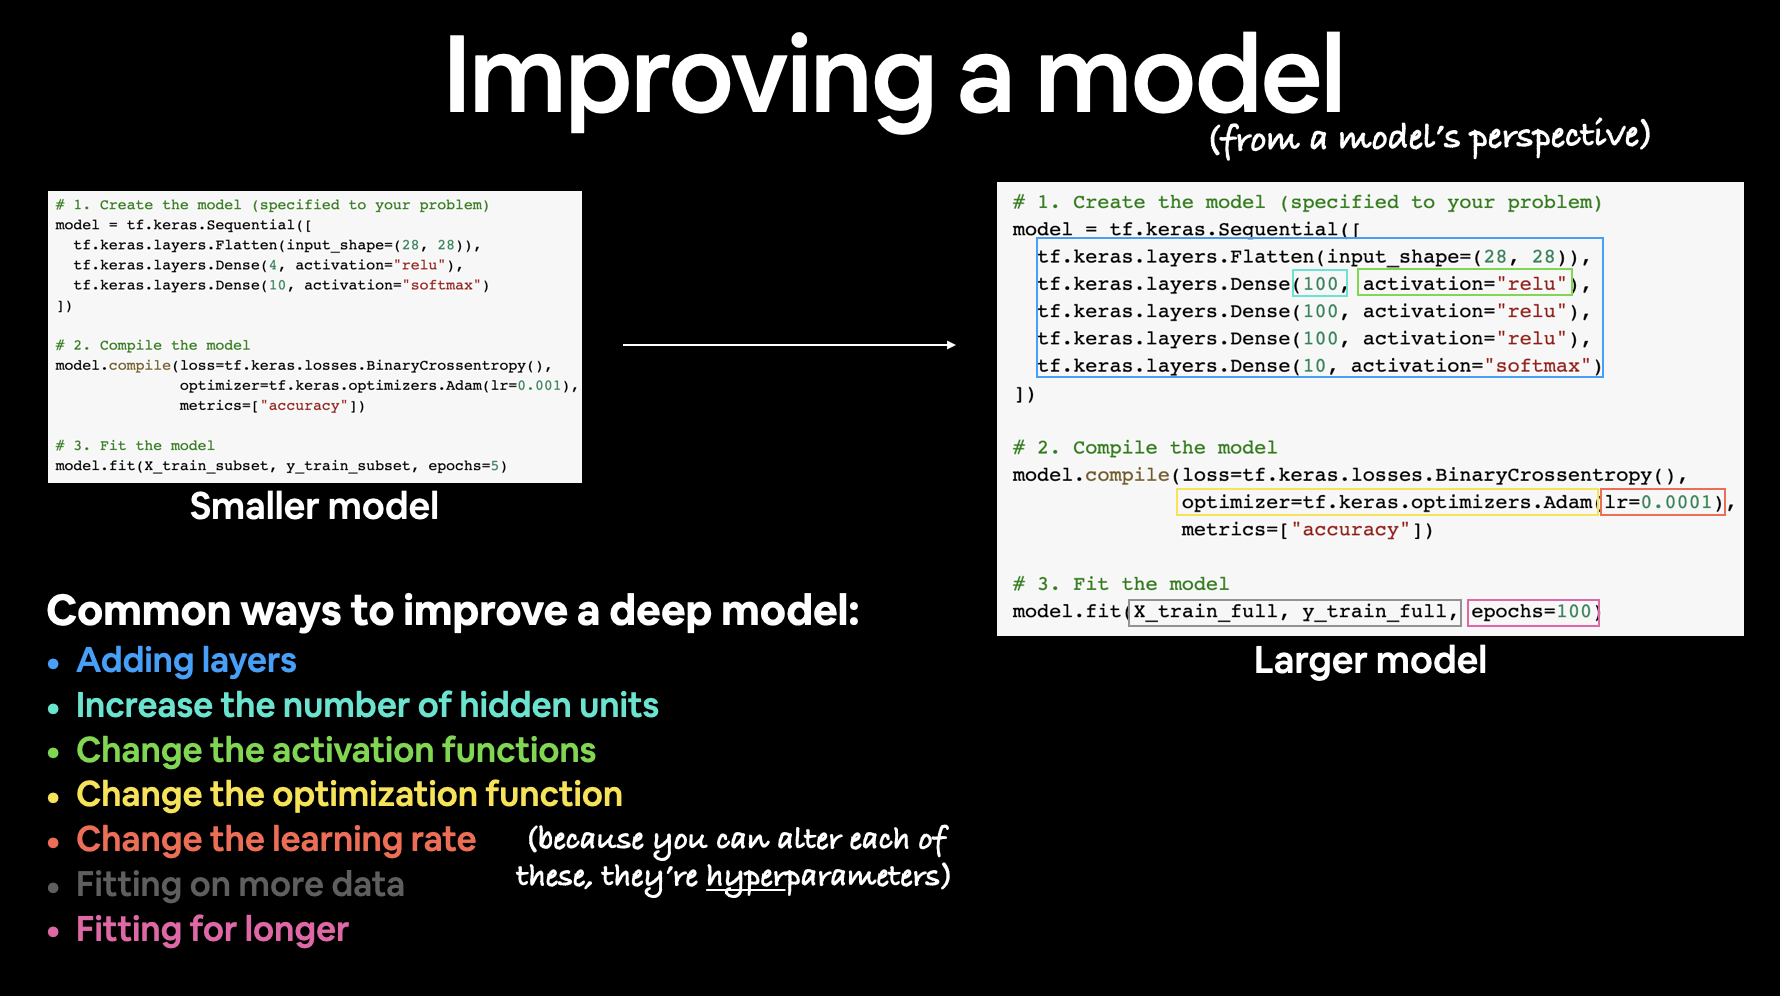


In [ ]:
#set random seed
tf.random.set_seed(42)

#Create the model
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


#compile the model

history=model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fit the model
history=model3.fit(X,y,epochs=200,verbose=0)

In [ ]:
model3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4890


[0.6936520934104919, 0.48899999260902405]

#Visualize the prediction

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize.** Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

Takes in a trained model, features (X) and labels (y).
Creates a meshgrid of the different X values.
Makes predictions across the meshgrid.
Plots the predictions as well as a line between the different zones (where each unique class falls).
If this sounds confusing, let's see it in code and then see the output.

🔑 **Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


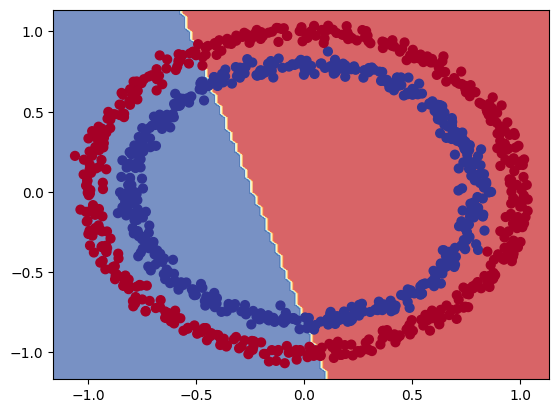

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model3, X, y)

Text(0.5, 0, 'epochs')

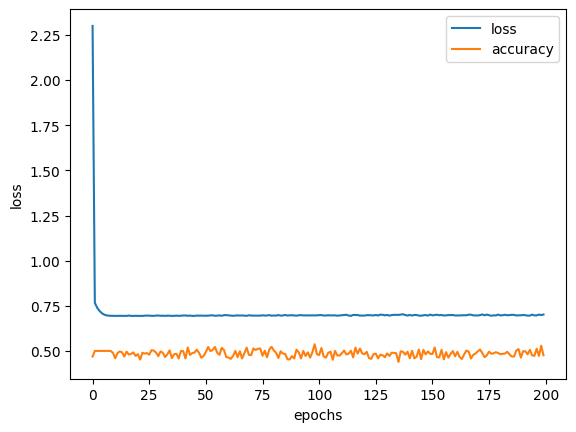

In [ ]:
#plot the History
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

#So by observing the graph we can see that our model try to seperate linearly but data is non linear so

#how to achive the non linearity?
#Using Activation function we can achive it

1. ReLu
2. Leaky ReLu
3. tanh
4. sigmoid  (Binary)
5. softmax  (Multiclass)

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create the model
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


#compile the model

model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fit the model
model4.fit(X,y,epochs=30,verbose=0)  #Just in 30 epochs we are achiving the good accuaracy.

In [ ]:
model4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0785 - accuracy: 1.0000


[0.07854312658309937, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


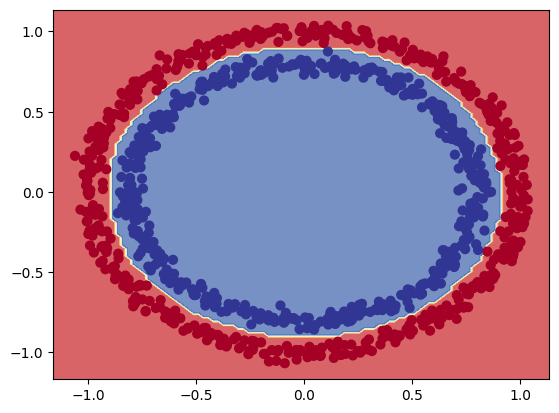

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model4, X, y)


Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 **Note:** The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

#

#Evaluating and Improving Our Classification

So far we've been training and testing on the same dataset However, in machine learning this is bassically a sin.
So let's create a training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
X_train

array([[ 0.65794626, -0.46508097],
       [ 0.63194897, -0.7346633 ],
       [-1.00861631, -0.12403051],
       ...,
       [ 0.01574478, -1.02998534],
       [ 1.01102578,  0.16802846],
       [ 0.55778227, -0.57087612]])

* Higher learning rate fastly our model converge to the solution means optimizer find the minama of loss function but. Chance to overshoot the Minima of loss function

* Lower the learing rate slowly our model converge to the solution means optimizer find the minima slowly of the loss function. chance to stuck in local minima or saddle point and compuationally costly

In [ ]:
#set random seed
tf.random.set_seed(42)

#Create the model
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


#compile the model

model5.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

#fit the model
history=model5.fit(X_train,y_train,epochs=25,verbose=0)  #Just in 30 epochs we are achiving the good accuaracy.


In [ ]:
model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (32, 100)                 300       
                                                                 
 dense_44 (Dense)            (32, 10)                  1010      
                                                                 
 dense_45 (Dense)            (32, 1)                   11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model5.evaluate(X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9950


[0.018962349742650986, 0.9950000047683716]

In [ ]:
model5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9900


[0.04506572335958481, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


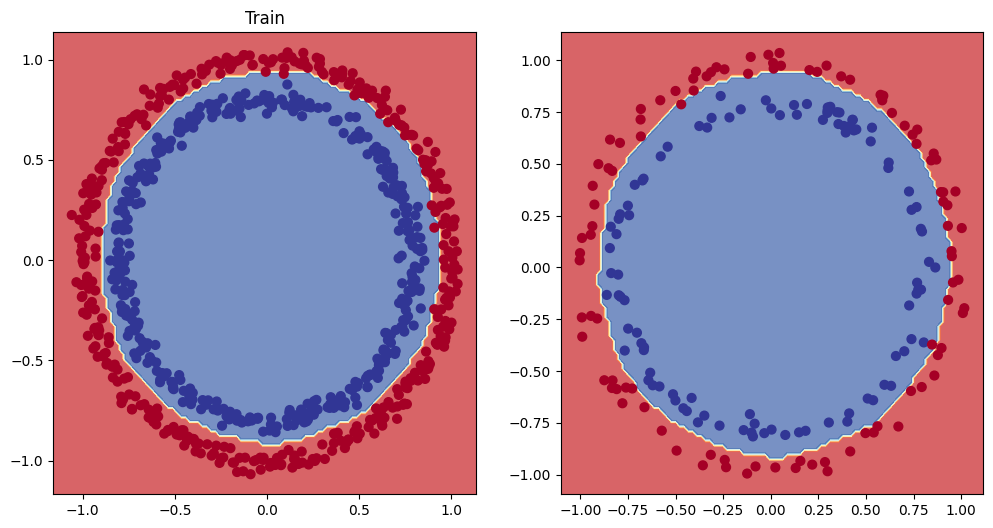

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model5,X=X_train,y=y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model5,X=X_test,y=y_test)
plt.show()

Text(0.5, 1.0, 'Model losss curve')

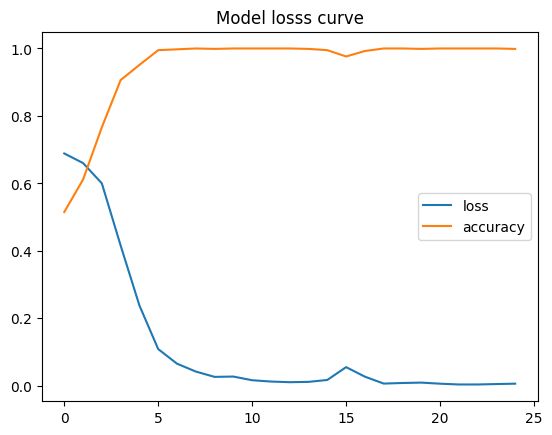

In [ ]:
#plot history
pd.DataFrame(history.history).plot()
plt.title("Model losss curve")

**Note:** For many problems the loss functions decreasing means our model is improving

#How to chose Best Learnig Rate?

#Finding the best learnign rate
#To find the ideal learning rate we are going to use the following steps:
* A learning rate **caback** you can think of a callback
ad an extra piece of functionality, you can add to your *while* its training
* Another model
* A modified loss curves plot.

In [ ]:
# set the random seed
tf.random.set_seed(42)

#create the model
model6=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#Compile the model
model6.compile(loss='binary_crossentropy',
               optimizer='Adam',
               metrics=['accuracy'])
#Create the learnign rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10**(epoch/20))

# Fit the model
history=model6.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5100 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5200 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5113 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: >

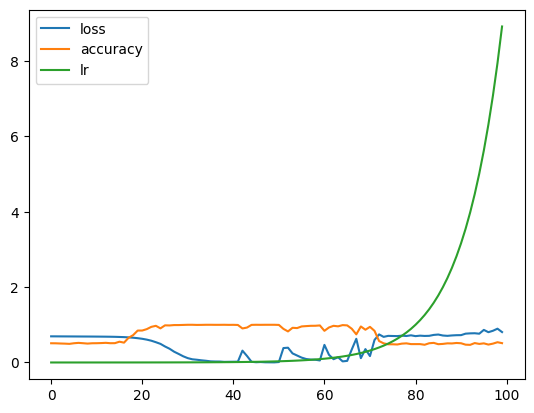

In [ ]:
#check out the history
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Loss vs Learning Rate')

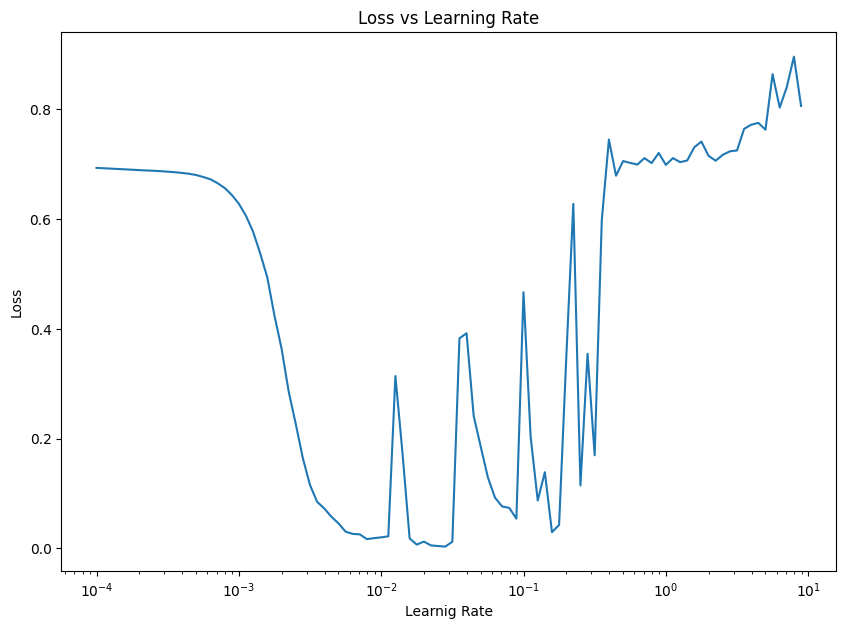

In [ ]:
#plot the learning rate verses the loss
lrs=1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel("Learnig Rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning Rate")

In [ ]:
#Lets try with higher of "Ideal" learning rate
#set random seed
tf.random.set_seed(42)
#Create the model
model7=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#Compile the model
model7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['accuracy'])
history7=model7.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5050
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5000
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5000
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5337
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5400
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6699 - accuracy: 0.5188
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6775
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.7038
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6900
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.8225
Epoch 11/20
25/25 [

In [ ]:
#Evaluate model7 with the test dataset
model7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.9950


[0.3845023810863495, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


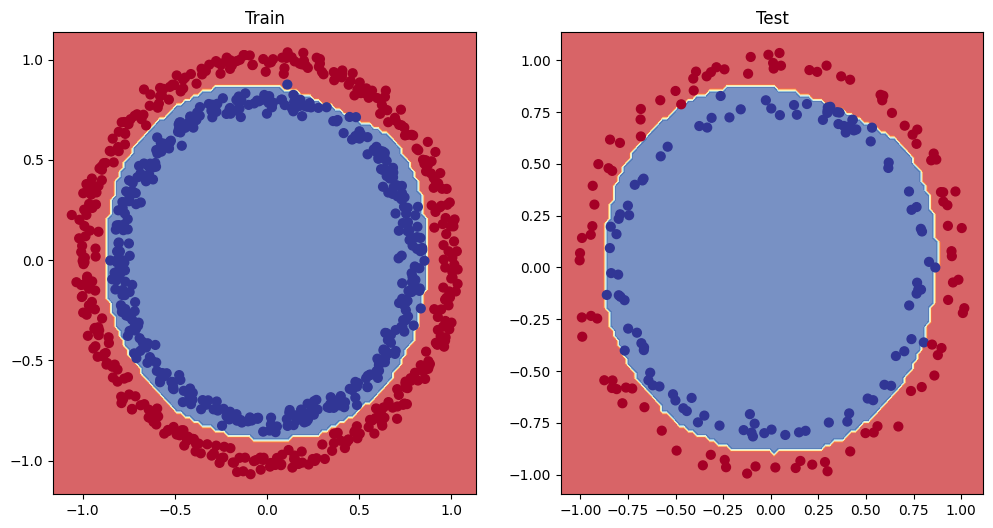

In [ ]:
#plot the decision bourdries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model7,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model7,X=X_test,y=y_test)
plt.show()

#More evaluation Methods

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model7.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   0],
       [  1,  99]])

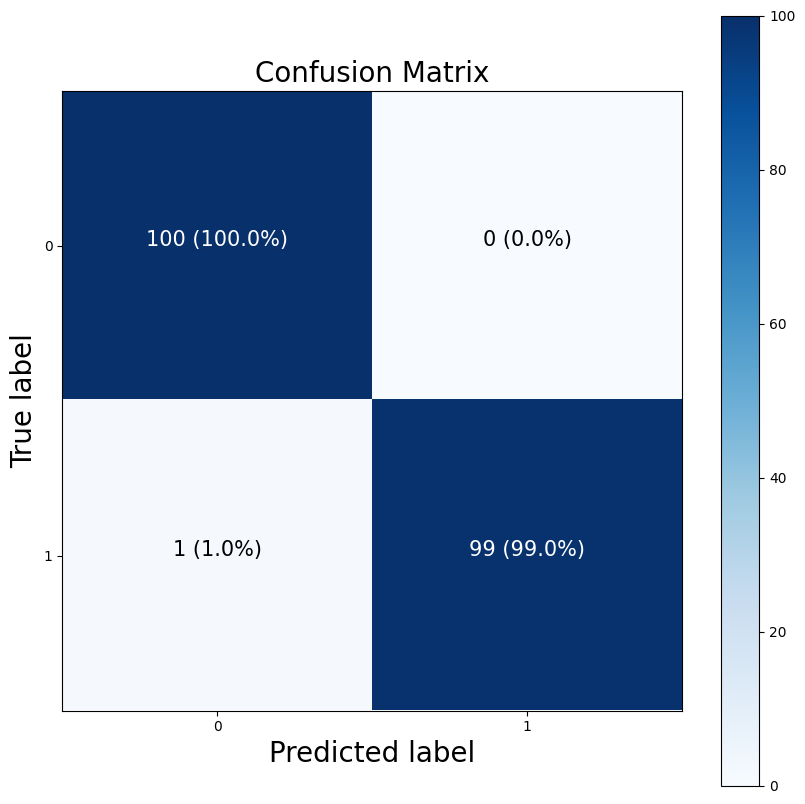

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


# *Working* with a larger example (multiclass classification)
We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

Woah, we get a large list of numbers, followed (the data) by a single number (the class label).

What about the shapes?

In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.

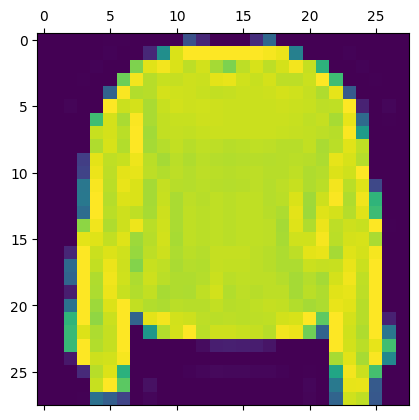

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(train_data[7]);


It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on the dataset's GitHub page).

🔑 Note: Whilst this dataset has been prepared for us and ready to go, it's important to remember many datasets won't be ready to go like this one. Often you'll have to do a few preprocessing steps to have it ready to use with a neural network (we'll see more of this when we work with our own data later).

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

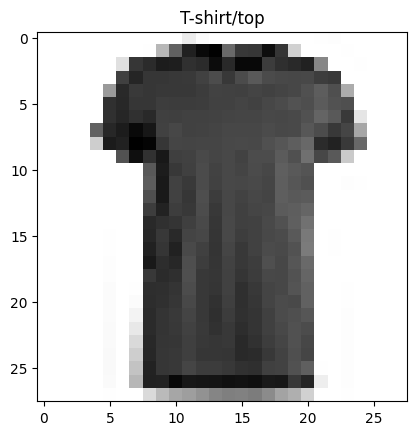

In [ ]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

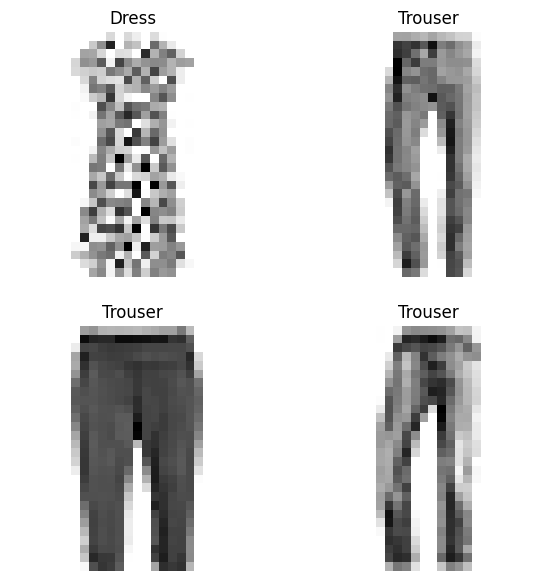

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
* We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
* More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.
You ready? Let's go.

In [ ]:
import tensorflow as tf
#set the random seed
tf.random.set_seed(42)

#Create the Model
model8=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

#compile the model

model8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

#Fit the model
model8.fit(train_data,train_labels,epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


# Lets add Flatten Layer

In [ ]:
import tensorflow as tf
#set the random seed
tf.random.set_seed(42)

#Create the Model
model8=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

#compile the model

model8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

#Fit the model
model8.fit(train_data,train_labels,epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


## Still We got Error bcz labels not one hot encoded
* If labels are integer from use SparseCategoricalCrossentropy()
* If labels one hot encoded then use CategoricalCrossentropy()

In [ ]:
import tensorflow as tf
#set the random seed
tf.random.set_seed(42)

#Create the Model
model8=tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

#compile the model

model8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])

#Fit the model
hon_normal_history=model8.fit(train_data,train_labels,epochs=10,
           validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2311 - accuracy: 0.1537 - val_loss: 2.0076 - val_accuracy: 0.1813
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8511 - accuracy: 0.2359 - val_loss: 1.7058 - val_accuracy: 0.2899
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6743 - accuracy: 0.2888 - val_loss: 1.6465 - val_accuracy: 0.2923
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6336 - accuracy: 0.2907 - val_loss: 1.6281 - val_accuracy: 0.2783
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6151 - accuracy: 0.2902 - val_loss: 1.6093 - val_accuracy: 0.2854
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6028 - accuracy: 0.2844 - val_loss: 1.5986 - val_accuracy: 0.2792
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5957 - accuracy: 0.2851 - val_loss: 1.5925 - val_accuracy:

In [ ]:
model8.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_58 (Dense)            (None, 4)                 3140      
                                                                 
 dense_59 (Dense)            (None, 4)                 20        
                                                                 
 dense_60 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min(),train_data.max()

(0, 255)

Neural Networks data to be scaled (or Normalized), it means they like to have the numbers in the range between 0 and 1

In [ ]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0


In [ ]:

#Now our data is normalize lets build the model to find the pattern in it

#set random seed
tf.random.set_seed(42)

#Create a model

model9=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
#Compile the model
model9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer='adam',
               metrics=['accuracy']
               )
#Fit the model
norm_hist=model9.fit(train_data_norm,train_labels
                     ,epochs=10,
                     validation_data=(test_data_norm,test_labels))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8737 - accuracy: 0.2572 - val_loss: 1.6537 - val_accuracy: 0.3085
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2816 - accuracy: 0.4831 - val_loss: 1.0254 - val_accuracy: 0.6117
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9410 - accuracy: 0.6352 - val_loss: 0.8992 - val_accuracy: 0.6690
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8581 - accuracy: 0.6667 - val_loss: 0.8451 - val_accuracy: 0.6737
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8189 - accuracy: 0.6701 - val_loss: 0.8233 - val_accuracy: 0.6822
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7970 - accuracy: 0.6789 - val_loss: 0.8035 - val_accuracy: 0.6953
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7841 - accuracy: 0.6830 - val_loss: 0.8100 - val_accuracy:

<Axes: title={'center': 'normalized data'}>

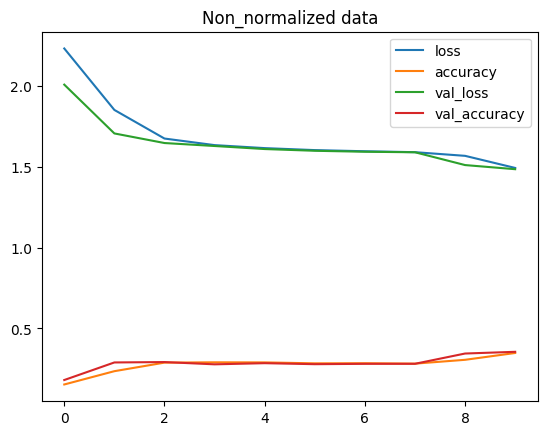

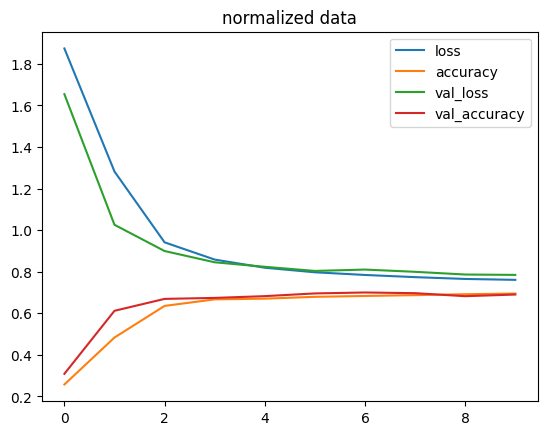

In [ ]:
import pandas as pd
#plot the non-normalized data loss curve
pd.DataFrame(hon_normal_history.history).plot(title="Non_normalized data")

#plot the normalized data loss curve
pd.DataFrame(norm_hist.history).plot(title="normalized data")

#Findind the ideal learning rate

In [ ]:
#set the random seed
tf.random.set_seed(42)

#buid the model
model10=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

#compile the model
model10.compile(loss='SparseCategoricalCrossentropy',
                optimizer='adam',
                metrics=['accuracy'],
                )
#create the learning rate callback
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

find_lr_history=model10.fit(train_data_norm,
            train_labels,
            epochs=40,
            validation_data=(test_data_norm,test_labels),
            callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1530 - accuracy: 0.5889 - val_loss: 0.8423 - val_accuracy: 0.6917 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7497 - accuracy: 0.7256 - val_loss: 0.7293 - val_accuracy: 0.7321 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6822 - accuracy: 0.7438 - val_loss: 0.6953 - val_accuracy: 0.7418 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6534 - accuracy: 0.7547 - val_loss: 0.6687 - val_accuracy: 0.7487 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6339 - accuracy: 0.7604 - val_loss: 0.6520 - val_accuracy: 0.7586 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6092 - accuracy: 0.7751 - val_loss: 0.6395 - val_accuracy: 0.7738 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

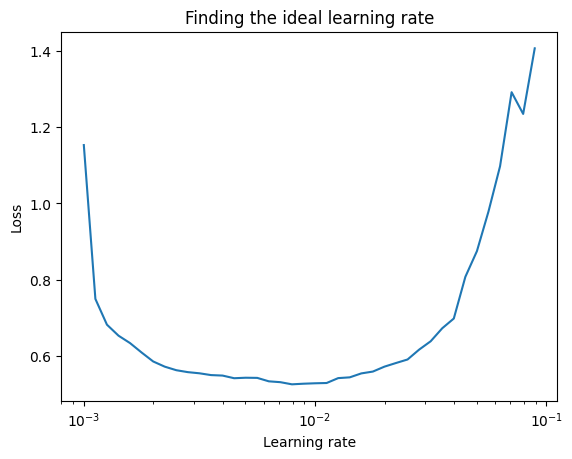

In [ ]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs=1e-3*(10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")


In [ ]:
#Let's refit a model with the ideal learning rate
#set the random seed
tf.random.set_seed(42)

#buid the model
model11=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

#compile the model
model11.compile(loss='SparseCategoricalCrossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'],
                )
history11=model11.fit(train_data_norm,
            train_labels,
            epochs=20,
            validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1128 - accuracy: 0.6094 - val_loss: 0.8030 - val_accuracy: 0.7231
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7235 - accuracy: 0.7491 - val_loss: 0.7081 - val_accuracy: 0.7469
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6651 - accuracy: 0.7637 - val_loss: 0.6802 - val_accuracy: 0.7556
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6400 - accuracy: 0.7704 - val_loss: 0.6636 - val_accuracy: 0.7630
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6263 - accuracy: 0.7735 - val_loss: 0.6511 - val_accuracy: 0.7675
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6157 - accuracy: 0.7765 - val_loss: 0.6537 - val_accuracy: 0.7654
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6104 - accuracy: 0.7787 - val_loss: 0.6636 - val_accuracy

#Evaluating and improve our multi-class classsification model


In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:

#make some prediction with our model
y_preds=model11.predict(test_data_norm)
y_preds[:5]

313/313 [==============================] - 1s 3ms/step


array([[7.5803422e-07, 4.6418273e-04, 2.2549362e-09, 3.6406181e-14,
        4.4858021e-07, 1.5048645e-01, 1.4751554e-07, 4.3226111e-01,
        3.2115288e-04, 4.1646570e-01],
       [2.8307351e-05, 3.4497963e-05, 8.9528203e-01, 1.9433031e-05,
        3.5741165e-02, 2.4537136e-18, 6.4445615e-02, 1.1984747e-11,
        4.4489740e-03, 1.2244924e-11],
       [2.3351685e-09, 9.9955696e-01, 1.8962323e-08, 4.1029870e-04,
        3.2664415e-05, 0.0000000e+00, 4.3943562e-08, 0.0000000e+00,
        4.1862746e-12, 3.8434632e-15],
       [4.3447871e-12, 9.9934429e-01, 3.0019587e-10, 6.5570982e-04,
        2.4261757e-08, 0.0000000e+00, 4.3441598e-11, 0.0000000e+00,
        7.4489957e-16, 2.9255674e-11],
       [2.0048252e-01, 1.2452384e-03, 2.1227644e-01, 6.6667162e-02,
        3.1860154e-02, 5.3787005e-08, 4.6437380e-01, 9.6668337e-08,
        2.3087526e-02, 6.9320376e-06]], dtype=float32)

In [ ]:
tf.argmax(y_preds)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([8759, 6991, 6402, 9943,  649, 7074, 6447, 4580, 9234, 4959])>

In [ ]:
#convet all of the prediction probabilities into the integers
y_preds=y_preds.argmax(axis=1)



In [ ]:
#view first 10 labels
y_preds[:10]

array([7, 2, 1, 1, 6, 1, 4, 4, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,y_preds)

array([[757,   2,  15,  83,  14,   1, 117,   0,  10,   1],
       [  5, 916,   2,  46,  21,   0,   9,   0,   1,   0],
       [ 19,   0, 558,  11, 200,   1, 201,   0,  10,   0],
       [ 81,  12,   6, 768,  55,   0,  74,   0,   4,   0],
       [  2,   3,  88,  17, 778,   0,  99,   0,  13,   0],
       [  2,   0,   0,   0,   0, 843,   1,  91,  24,  39],
       [180,   3, 153,  59, 213,   1, 375,   0,  16,   0],
       [  0,   0,   0,   0,   0,  20,   0, 955,   4,  21],
       [ 11,   0,  29,   2,   9,   7,  21,   5, 914,   2],
       [  0,   0,   0,   0,   0,  18,   0,  87,   0, 895]])

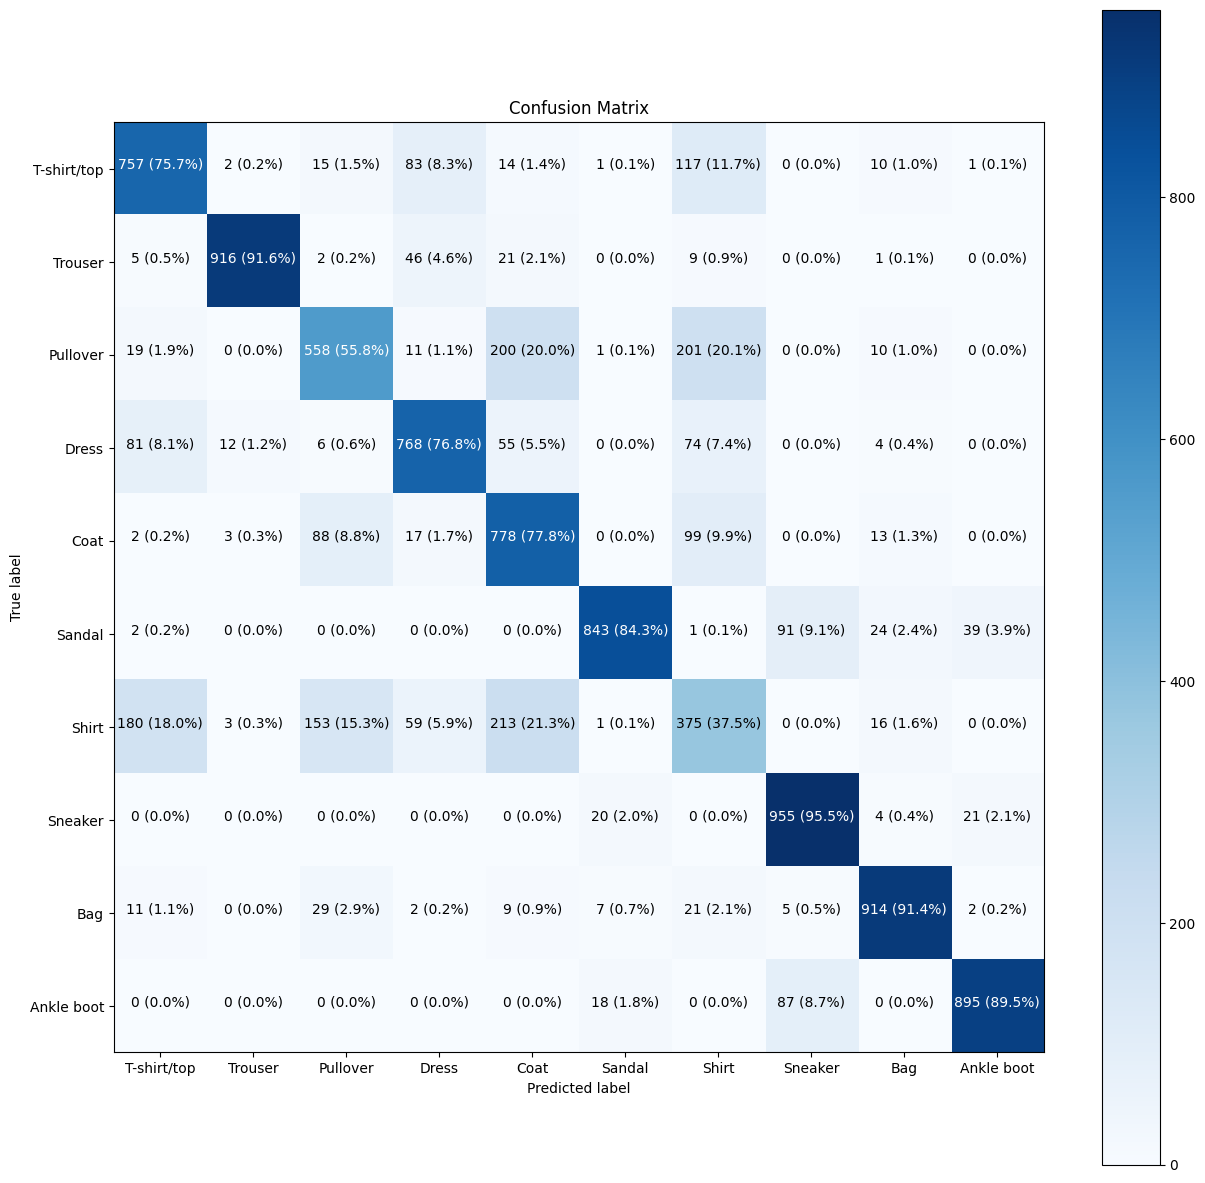

In [ ]:
import numpy as np
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,classes=class_names,figsize=(15,15),text_size=10)

That looks much better! (one of my favourites sights in the world is a confusion matrix with dark squares down the diagonal)

Except the results aren't as good as they could be...

It looks like our model is getting confused between the Shirt and T-shirt/top classes (e.g. predicting Shirt when it's actually a T-shirt/top).

🤔 Question: Does it make sense that our model is getting confused between the Shirt and T-shirt/top classes? Why do you think this might be? What's one way you could investigate?

We've seen how our models predictions line up to the truth labels using a confusion matrix, but how about we visualize some?

Let's create a function to plot a random image along with its prediction.

🔑 Note: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

#check out a random image as well as its prediction


In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 21ms/step


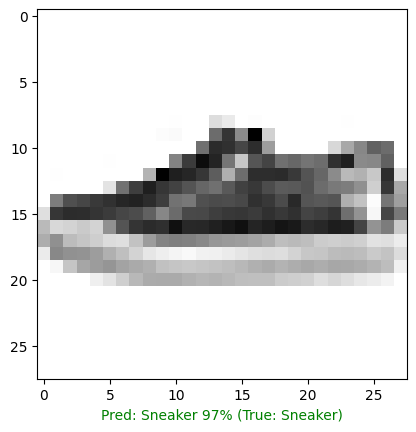

In [ ]:
plot_random_image(model=model11,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

#What patterns our model Learning

In [ ]:
#find the layers of our most recent model
model11.layers

In [ ]:
#Extract the particular layer
model11.layers[1]

#Kernel initializer for random weights is 'glorot_uniform'

#Bias initializer is zero matrix

In [ ]:
#Get the patterns of a layers in our network
weights,biases=model11.layers[1].get_weights()
#Shpes
weights,weights.shape


(array([[ 0.07117784, -0.63290757,  0.31125557, -0.26013464],
        [-0.05029482,  0.6484278 , -0.51595074, -0.49460286],
        [-0.06623264, -1.017332  , -0.71379924, -0.51195043],
        ...,
        [-0.00895431,  0.22312962, -0.25096226, -0.54515225],
        [ 0.04152544,  0.45992893, -0.07202441, -0.6540588 ],
        [-0.0553457 ,  0.088473  , -0.49421793, -0.609991  ]],
       dtype=float32),
 (784, 4))

In [ ]:
model11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([-0.02140632,  2.023088  ,  0.75414294,  1.4442866 ], dtype=float32),
 (4,))